In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [6]:
df=pd.read_csv(r"D:\Python\Project\Customer Personality Analysis\Customer-Personality-Analysis\marketing_campaign.csv",sep="\t").dropna()
df.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0


# Cleaning And Preprocessing

In [7]:
# Making different List on Coloumn Namee

amount=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
place=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
promotion=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','NumDealsPurchases']


In [8]:
# Preprocess the Marital Status
df['Marital_Status']=df['Marital_Status'].replace({'Together':'Married','Alone':'Single'})

In [9]:
# Income is highly Skewed and have some Outliers

ul,ll=np.percentile(df['Income'],[97,3])
df['Income']=df['Income'].apply(lambda x: x if x<ul else ul)

df['Income']=df['Income'].apply(lambda x: x if x>ll else ll)

In [10]:
# Preprocess the Education Status
und=['Graduation','2n Cycle','Basic']
df['Education_sort']=df['Education'].apply(lambda x : 'Undergraduate' if x in und else 'PostGraduate')

In [11]:
# Total children in Home
df['Children']=df['Kidhome']+df['Teenhome']
df['Children'].value_counts()

Children
1    1117
0     633
2     416
3      50
Name: count, dtype: int64

In [12]:
# Total Spent by Customer
df['TotalSpent']=df['MntFishProducts']+df['MntFruits']+df['MntGoldProds']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntWines']

In [13]:
# Calculating Age by Birth Year
df['age']=2024-df['Year_Birth']

In [14]:
# Treat the Outlier of the Age using IQR Methord
mu=df['age'].mean()
std=df['age'].std()
ul= mu+3*std

df['age']=df['age'].apply(lambda x: x if x<ul else ul)

In [15]:
# Making Bins Of Age
age_bins = [0, 35, 45, 55, 65, 75, float('inf')]
age_labels = ['Under 35', '35-45', '46-55', '56-65', '66-75', 'Over 75']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [16]:
# Creating a coloumn shows that whether the customer is a Parent or Not
df['Parent']= np.where(df['Children']>0,1,0)

df['Parent'].value_counts()

Parent
1    1583
0     633
Name: count, dtype: int64

# Data Visualization

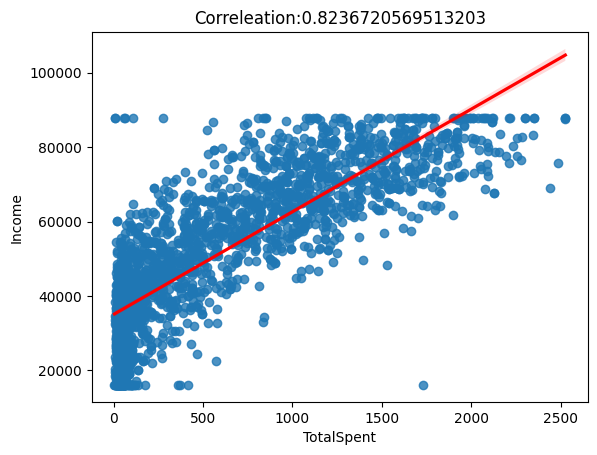

In [17]:
# Does the Income level depends on the Total spend

sns.regplot(x=df['TotalSpent'],y=df['Income'],line_kws={'color' :'Red'})
plt.title(f"Correleation:{df['TotalSpent'].corr(df['Income'])}")
plt.show()

#As we can see a positive correlation between them, we can say that as a person's income increases, their spending also tends to increase.

c:\Users\MY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\MY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\MY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


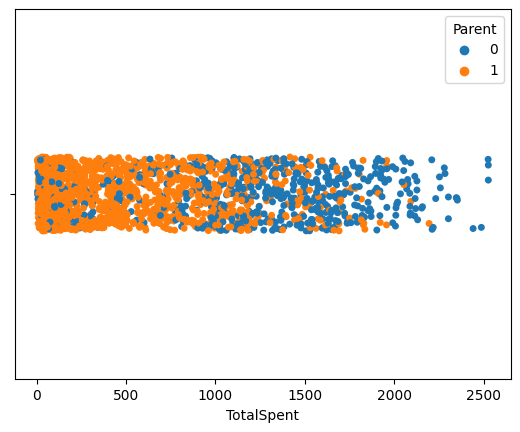

In [18]:
# Relation between there Expenditure and if they are parents or not

sns.stripplot(x=df['TotalSpent'], hue=df['Parent'])

plt.show()

# we can say that customer with 0 childern are spent more

C:\Users\MY\AppData\Local\Temp\ipykernel_2256\1168698308.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='age_group')['TotalSpent'].mean().plot(kind='bar')


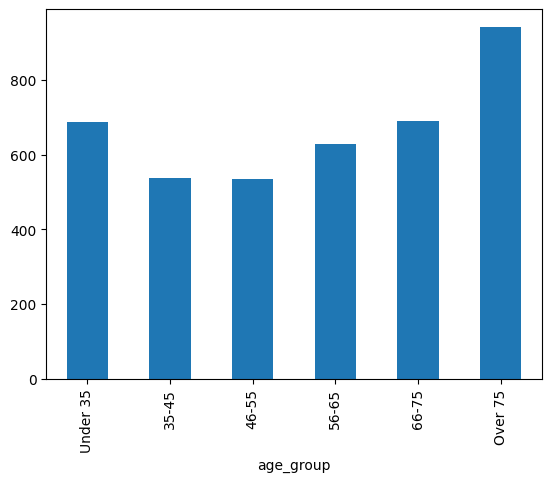

In [19]:
# Which age group is shopping most 

df.groupby(by='age_group')['TotalSpent'].mean().plot(kind='bar')
plt.show()

# People Above 75 is shopping the most 

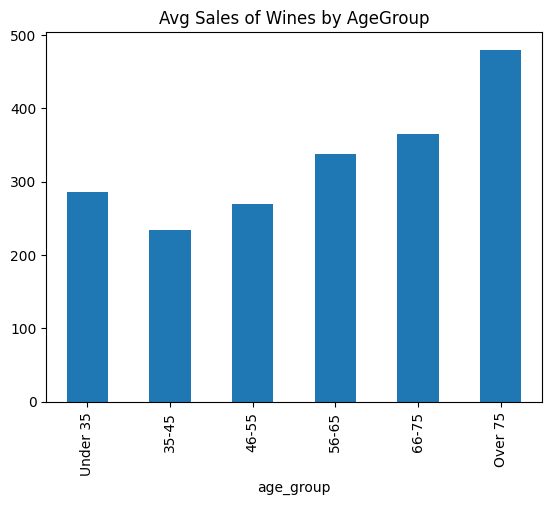

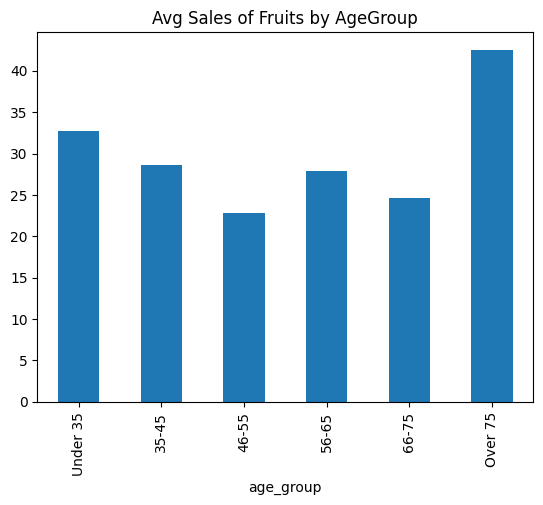

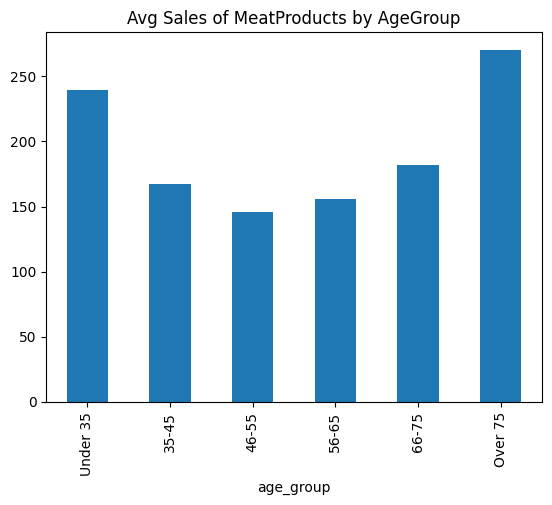

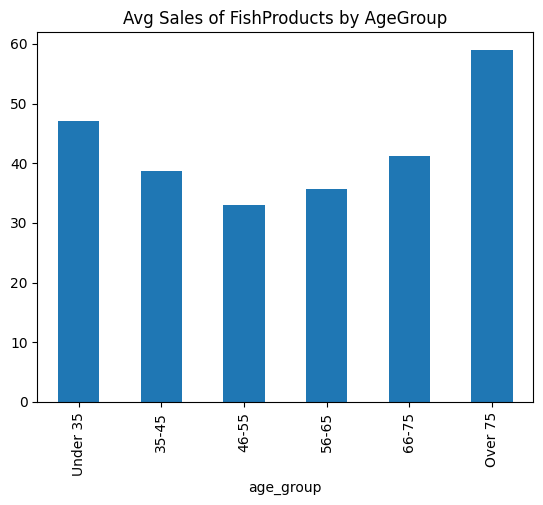

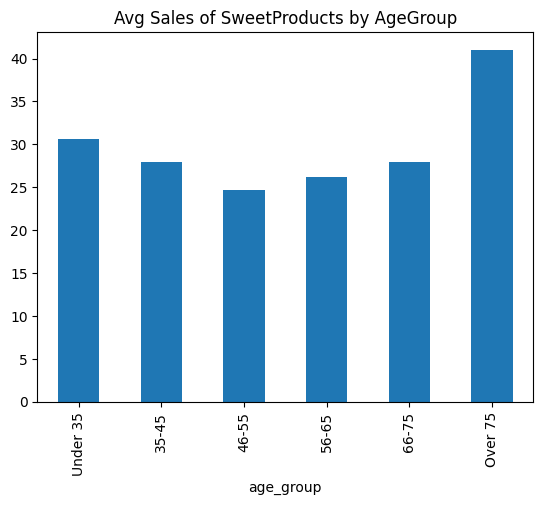

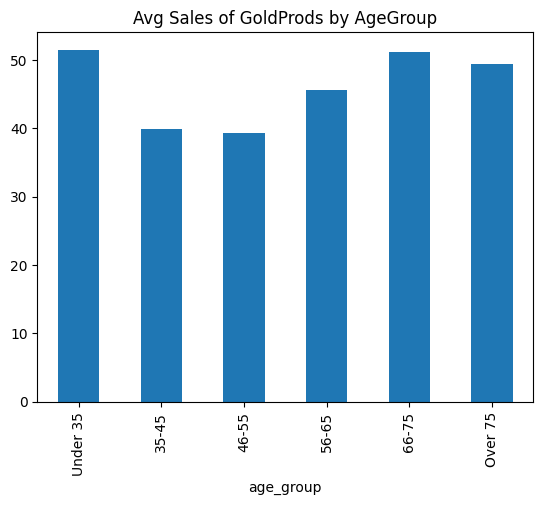

In [20]:
# Which Age Group Buy which product the most 
for i in amount:
    df.groupby(by='age_group',observed=True)[i].mean().plot(kind='bar')
    plt.title(f'Avg Sales of {i[3:]} by AgeGroup')
    plt.show()


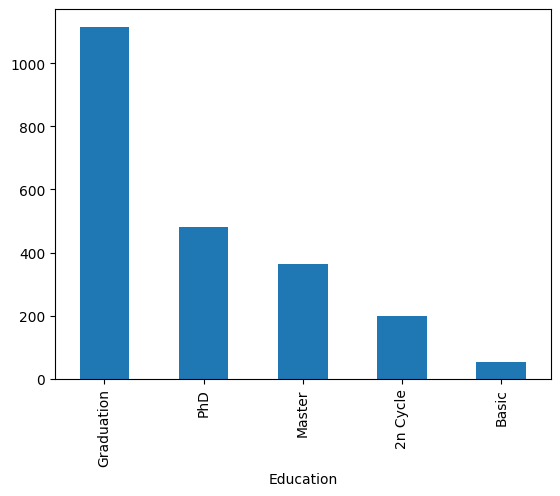

In [21]:
# Distribution of Customer based on Eductaion

df['Education'].value_counts().plot(kind='bar')
plt.show()

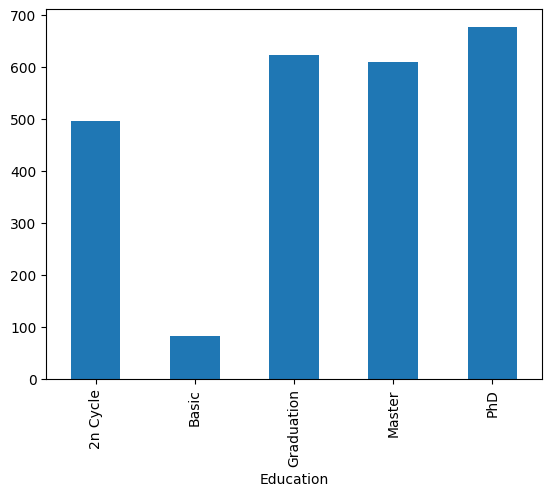

In [22]:
df.groupby('Education')['TotalSpent'].mean().plot(kind='bar')
plt.show()

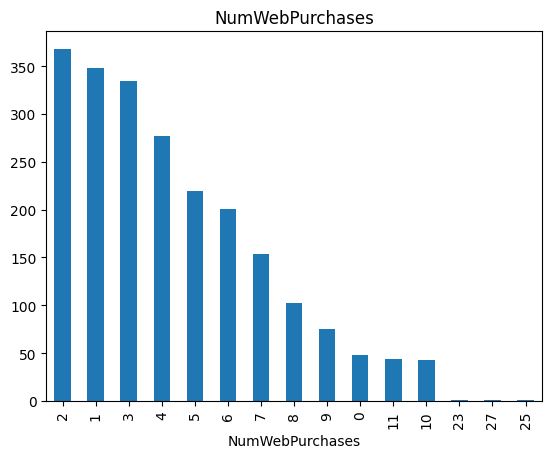

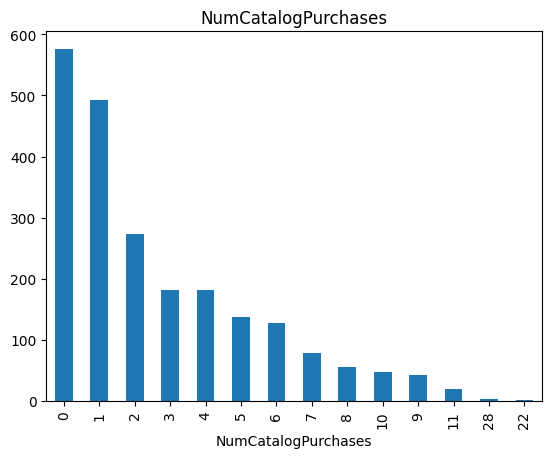

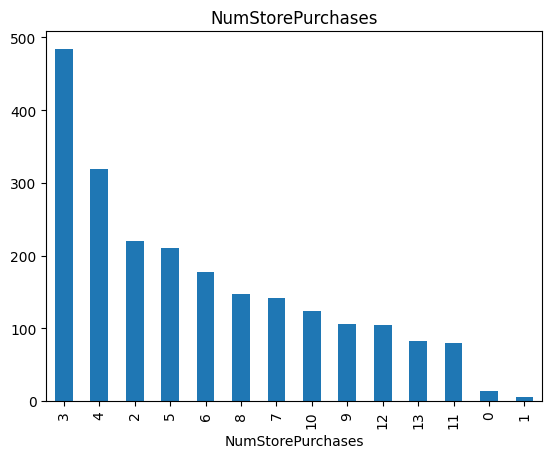

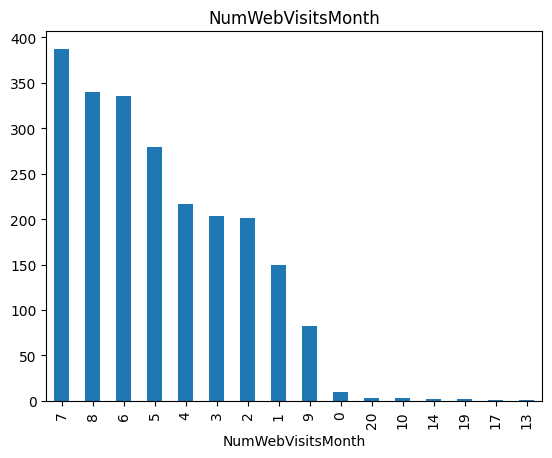

In [29]:
for i in place:
    df[i].value_counts().plot(kind='bar')
    plt.title(i)
    plt.show()
    

In [24]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_sort', 'Children', 'TotalSpent', 'age', 'age_group',
       'Parent'],
      dtype='object')